In [1]:
%matplotlib inline

In [25]:
import os
import json
import csv
import matplotlib
import matplotlib.ticker as tkr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates

In [212]:
business_abspath = os.path.abspath("../data/business.csv")
df = pd.read_csv(business_abspath)

In [348]:
df[df['name']=="Deluca's Diner"]

,attributes,business_id,categories,city,full_address,name,open,review_count,stars,state,score
19929,"{'Accepts Credit Cards': False, 'Parking': {'v...",vvPzcOhbQn5fLQUAIxcP6A,"[Breakfast & Brunch, Restaurants]",Pittsburgh,"2015 Penn Ave\nStrip District\nPittsburgh, PA ...",Deluca's Diner,True,385,4.0,PA,1540.0


In [213]:
df['score'] = df['stars'] * df['review_count']
df['categories'] = df['categories'].apply(lambda s:
                   [i.strip() for i in s.split('[')[-1].split(']')[0].replace('\'','').split(',')])

In [340]:
city = df['city'][100]
state = df[df['city']==city]['state'].unique()[0]
category = 'Bars'
if category:
    df_city = df[(df['city'] == city) & (df['categories'].apply(lambda x: category in x))].sort_values(by='score', ascending=False)
else:
    df_city = df[(df['city'] == city)].sort_values(by='score', ascending=False)
max_score = df_city['score'].values[0]

In [341]:
df_city.shape

(363, 11)

In [342]:
rows=df_city.shape[0]
if rows < 15:
    x_axis=np.arange(rows)
    Y_score = df_city['score'].values
    X_name = df_city['name'].values
else:
    x_axis=np.arange(15)
    Y_score = df_city['score'][:15].values
    X_name = df_city['name'][:15].values

In [349]:
df_city

,attributes,business_id,categories,city,full_address,name,open,review_count,stars,state,score
20008,"{'Accepts Credit Cards': True, 'Good for Kids'...",Q4ULAiIE2qCA4RYplCTrUQ,"[Bars, Restaurants, Nightlife, American (New),...",Pittsburgh,"46 18th St\nStrip District\nPittsburgh, PA 15222",Primanti Bros.,True,927,3.5,PA,3244.5
10870,"{'Accepts Credit Cards': True, 'Good for Kids'...",bwu0cUZfksuu-uzTPrrl2A,"[Bars, American (Traditional), Nightlife, Rest...",Pittsburgh,"3525 Liberty Ave\nLawrenceville\nPittsburgh, P...",Church Brew Works,True,739,3.5,PA,2586.5
32037,"{'Accepts Credit Cards': True, 'Good for Kids'...",rR_szXNwNQB-MgEoTElb8Q,"[German, Pubs, Bars, Nightlife, Restaurants]",Pittsburgh,"2705 S Water St\nSouth Side\nPittsburgh, PA 15203",Hofbrauhaus Pittsburgh,True,463,4.0,PA,1852.0
60116,"{'Accepts Credit Cards': True, 'Good for Kids'...",UXlGymo9AduQcq-Q-H16og,"[Bars, Cocktail Bars, Nightlife, Italian, Pizz...",Pittsburgh,"942 Penn Ave\nDowntown\nPittsburgh, PA 15222",Sienna Mercato,True,457,4.0,PA,1828.0
19931,"{'Accepts Credit Cards': True, 'Good for Kids'...",cjD2yGRhT5yaSj_KP55Ptw,"[Bars, Caribbean, Nightlife, Restaurants]",Pittsburgh,"2000 Smallman St\nStrip District\nPittsburgh, ...",Kaya,True,445,4.0,PA,1780.0
413,"{'Accepts Credit Cards': True, 'Good for Kids'...",NeUf9FyCCIN4MEseNyqkXQ,"[Bars, Restaurants, Nightlife, American (New),...",Pittsburgh,"2 South Market Sq\nDowntown\nPittsburgh, PA 15222",Primanti Bros.,True,463,3.5,PA,1620.5
44153,"{'Accepts Credit Cards': True, 'Good for Kids'...",X7844DdJO4y2oVbcpxD-NA,"[Burgers, Bars, Pizza, Nightlife, Restaurants]",Pittsburgh,"5 Market Sq\nDowntown\nPittsburgh, PA 15222",Winghart's Burger & Whiskey Bar,True,371,4.0,PA,1484.0
59087,"{'Accepts Credit Cards': True, 'Good for Kids'...",r9rub_ajcb-3yYsYYD5apw,"[Nightlife, Bars, Restaurants, Pizza, Italian]",Pittsburgh,"139 7th St\nDowntown\nPittsburgh, PA 15222",Proper Brick Oven & Tap Room,True,334,4.0,PA,1336.0
49539,"{'Accepts Credit Cards': True, 'Good for Kids'...",oJwy0ELke7wS6WsztypYwQ,"[Bars, Nightlife, Barbeque, Restaurants]",Pittsburgh,"220 N Highland Ave\nEast Liberty\nPittsburgh, ...",Union Pig & Chicken,True,377,3.5,PA,1319.5
50215,"{'Accepts Credit Cards': True, 'Good for Kids'...",Nui7Cnhrhrm4Ar2rcSHbIA,"[Bars, American (New), Cocktail Bars, Nightlif...",Pittsburgh,"4305 Butler St\nLawrenceville\nPittsburgh, PA ...",Industry Public House,True,377,3.5,PA,1319.5


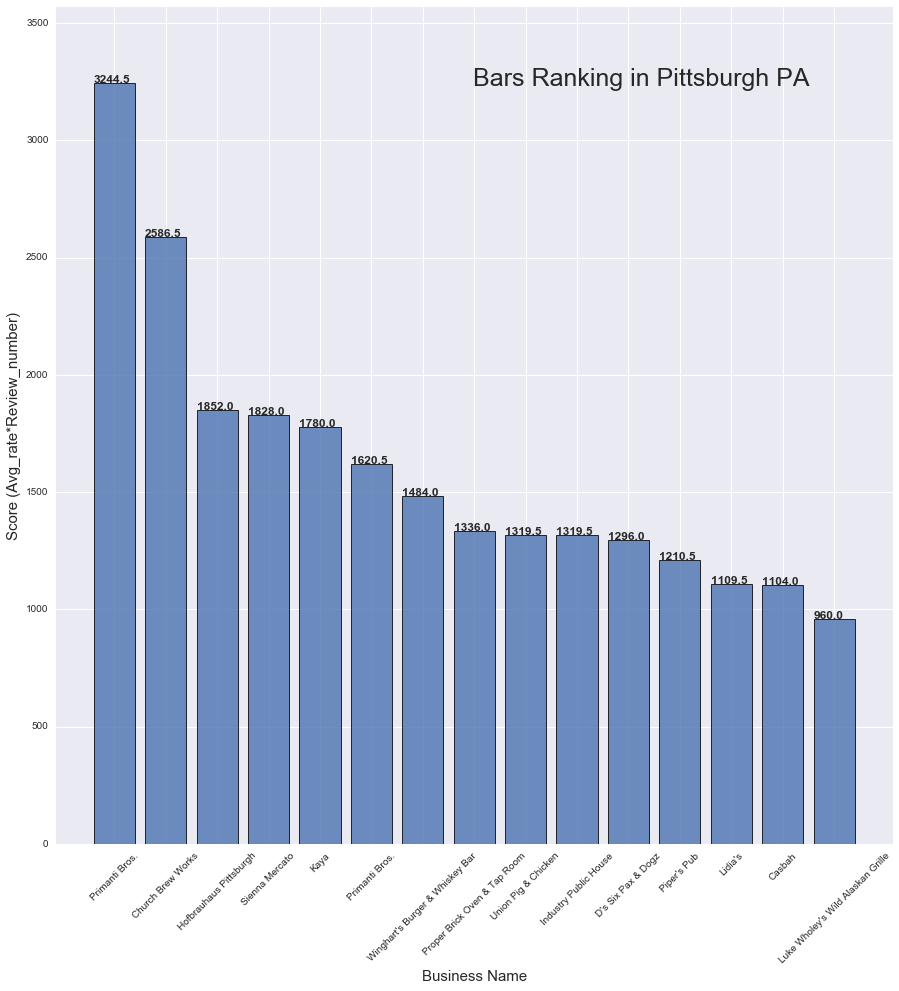

In [345]:
fig = plt.figure(figsize=(15,15))
ax = plt.subplot(111)

rect = ax.bar(x_axis, Y_score,linewidth=1.0, linestyle="-",align='center', alpha=0.8)
for v, i in enumerate(Y_score):
    ax.text(v-0.4, i+1, i, fontweight='bold')

ticks = ax.set_xticks(x_axis)
labels = ax.set_xticklabels(X_name, rotation=45, fontsize='small')
ax.set_title("{} Ranking in {} {}".format(category,city,state), x=0.5, y=0.9, fontsize=25)
ax.set_xlabel('Business Name', fontsize=15)
ax.set_ylabel('Score (Avg_rate*Review_number)',fontsize=15)
ax.set_ylim([0, max_score*1.1])
ax.margins(x=0.05)


In [8]:
business_abspath_json = os.path.abspath("../data/states_businesses.json")
df_json = pd.read_json(business_abspath_json)

In [41]:
temp = []
for i in range(len(df_json)):
    temp.append(df_json.iloc[i,0])
df_states = pd.DataFrame(temp)

In [45]:
df_states['address'] =df_states['location'].apply(lambda x: x['address1'])
df_states['state'] = df_states['location'].apply(lambda x: x['state'])
df_states['city'] =df_states['location'].apply(lambda x: x['city'])
df_states['zip_code'] =df_states['location'].apply(lambda x: x['zip_code'])

In [120]:
df_states['score'] = df_states['rating'] * df_states['review_count']

In [128]:
df_states.categories[2133]

[{'alias': 'coffee', 'title': 'Coffee & Tea'},
 {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'},
 {'alias': 'newamerican', 'title': 'American (New)'}]